In [1]:
from rdkit.Chem import Draw
from rdkit import Chem

In [2]:
import os
os.chdir('../programming_scripts/.')
print(os.getcwd())

from MS2LDA_core import run_lda
from MS2LDA_core import predict_with_lda

from FP_annotation import annotate_motifs
from Substructure_retrieval import retrieve_substructures

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\programming_scripts


In [3]:
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-COLLECTIONS-PESTICIDES-POSITIVE.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-SCIEX-LIBRARY.mgf"
spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\MEDUSA\notebooks\MS2LDA\PDE5_standards_annotated_pos_unique.mgf"

In [4]:
lda_model, corpus, id2word = run_lda(spectra_path=spectra_path, num_motifs=6, iterations=300)

In [5]:
smiles_per_motifs, predicted_motifs, predicted_motifs_distribution, spectra_per_motifs = predict_with_lda(lda_model, spectra_path, id2word)

### Annotation

In [6]:
fps_motifs = annotate_motifs(smiles_per_motifs, fp_type="adaptive", threshold=0.73) # if another fp then "adaptive" is used you obviously cannot retrieve substructures from it

[FP]: Executing calc_adaptive
[FP]: Executing calc_adaptive
[FP]: Executing calc_adaptive
[FP]: Executing calc_adaptive
[FP]: Executing calc_adaptive
[FP]: Executing calc_adaptive


In [16]:
substructure_matches = retrieve_substructures(fps_motifs, smiles_per_motifs)

In [17]:
substructure_matches

[['O', 'N', '[nH]', 'n', 'c1ccccc1', 'o'],
 ['N', '[nH]', 'n'],
 ['O', 'c1ccccc1', 'o'],
 ['O', 'N', '[nH]', 'n', 'nn', 'C=O', 'c1ccccc1', 'o'],
 ['O', 'C=O', 'c1ccccc1', 'o'],
 ['O', 'N', '[nH]', 'n', 'NS(=O)=O', 'C=O', 'S', 'c1ccccc1', 'o']]

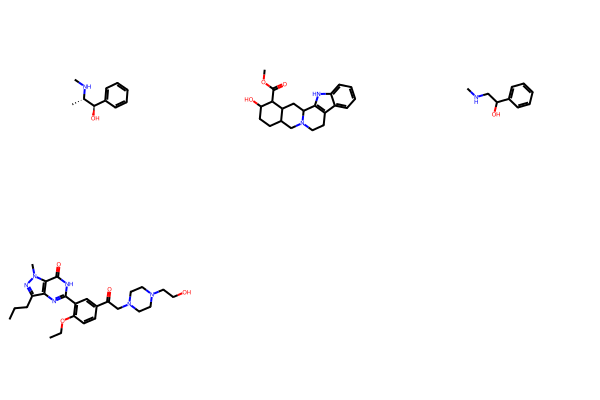

In [18]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smiles_per_motifs[0]])